In [1]:
!pip install rasterio
!pip install fiona
!pip install pysatproc
!pip install unetseg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 52.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 42.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.4 MB/s eta 0:00:00
  Created wheel for pysatproc: filename=pysatproc-0.1.9-py2.py3-none-any.whl size=35759 sha256=af98b737b55b61534b7c8045bc29e4c3d6e60693516e8923044010fee8af57c6
  Stored in directory: /root/.cache/pip/wheels/62/00/27/ec5c2b97f1a0cdfba672d1273ac7a6b4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pathlib

annotations_dir = '/content/drive/MyDrive/Basurales/AMBA/labels/ANOTACIONES/'
chips_dir = '/tmp/CHIPS/'
chip_size = 160
step_size = 48


In [3]:
def process_folder(location, output_dir, chip_size, step_size):
    image = location + "/*_RGB*.tif"
    labels = location + "/*.gpkg"

    !satproc_extract_chips \
        $image \
        -o  $chips_dir \
        --size $chip_size \
        --step-size $step_size \
        --aoi $labels \
        --labels $labels \
        --label-property 'clase' \
        --classes 'basural'

In [4]:
for location in map(lambda x: x.as_posix(), pathlib.Path(annotations_dir).iterdir()):
    print("Extracting chips from " + location)
    process_folder(location, chips_dir, chip_size, step_size)

Extracting chips from /content/drive/MyDrive/Basurales/AMBA/labels/ANOTACIONES/2021-OCTUBRE
Rasters:   0% 0/1 [00:00<?, ?it/s]
OCT-2021-AMBA-SENTINEL_RGB.tif windows:   0% 0/16 [00:00<?, ?it/s]
OCT-2021-AMBA-SENTINEL_RGB.tif windows:   6% 1/16 [00:00<00:08,  1.73it/s]
OCT-2021-AMBA-SENTINEL_RGB.tif windows: 100% 16/16 [00:00<00:00, 20.13it/s]
Rasters: 100% 1/1 [00:02<00:00,  2.52s/it]
Extracting chips from /content/drive/MyDrive/Basurales/AMBA/labels/ANOTACIONES/2021-NOVIEMBRE
Rasters:   0% 0/1 [00:00<?, ?it/s]
NOV-2021-AMBA-SENTINEL_RGB.tif windows:   0% 0/65 [00:00<?, ?it/s]
NOV-2021-AMBA-SENTINEL_RGB.tif windows:   2% 1/65 [00:01<01:08,  1.07s/it]
NOV-2021-AMBA-SENTINEL_RGB.tif windows:   8% 5/65 [00:01<00:10,  5.50it/s]
NOV-2021-AMBA-SENTINEL_RGB.tif windows:  12% 8/65 [00:01<00:06,  8.73it/s]
NOV-2021-AMBA-SENTINEL_RGB.tif windows:  18% 12/65 [00:01<00:04, 12.36it/s]
NOV-2021-AMBA-SENTINEL_RGB.tif windows:  25% 16/65 [00:02<00:07,  6.55it/s]
NOV-2021-AMBA-SENTINEL_RGB.tif windows:

In [6]:
image = "/content/drive/MyDrive/Basurales/AMBA/labels/ANOTACIONES/2021-DICIEMBRE/DIC-2021-AMBA-SENTINEL_RGB.tif"
labels = "/content/drive/MyDrive/Basurales/AMBA/labels/ANOTACIONES/2021-DICIEMBRE/IMAG-SENT-DIC-2021.gpkg"

!satproc_extract_chips \
        $image \
        -o  $chips_dir \
        --size $chip_size \
        --step-size $step_size \
        --aoi $labels \
        --labels $labels \
        --label-property 'clase' \
        --classes 'basural'

Rasters:   0% 0/1 [00:00<?, ?it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:   0% 0/187 [00:00<?, ?it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:   1% 1/187 [00:01<03:15,  1.05s/it]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:   3% 5/187 [00:01<00:32,  5.62it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:   5% 9/187 [00:01<00:16, 10.52it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:   9% 16/187 [00:01<00:08, 19.05it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  11% 20/187 [00:03<00:30,  5.52it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  12% 23/187 [00:03<00:25,  6.40it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  17% 31/187 [00:03<00:13, 11.24it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  19% 35/187 [00:03<00:11, 13.57it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  22% 42/187 [00:03<00:07, 19.85it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  27% 50/187 [00:04<00:08, 15.54it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  29% 54/187 [00:04<00:07, 17.49it/s]
DIC-2021-AMBA-SENTINEL_RGB.tif windows:  34% 63/187 [

In [9]:
from unetseg.train import TrainConfig, train
from unetseg.evaluate import plot_data_generator
import os

In [10]:
# Cuantas imágenes para entrenar ("chips") tenemos?
!ls $chips_dir/images/ | wc -l

14209


In [12]:
# Aqui va la cantidad de imágenes / chips disponibles
n_img = 14209

# batch size: cantidad de datos que se procesan por vez, puede ser limitado por 
# la memoria de gpu disponible 
batch = 96

# steps per epoch: típicamente debe ser igual al numero de imágenes / el batch_size 
# (con un 10% arriba esta bien), si es mayor incrementara el número de imágenes 
# generadas con image augmentation
steps = round((n_img / batch ) * 1.1)

# tamaño de la imagen procesada por la UNet (debe ser multiplos de 16 , por ej 160, 320, etc) y lo mas parecida posible a la resolucion de los chips
unet_input_size = 160

# donde guardar el modelo (ruta y nombre de archivo) // guardamos en drive para preservarlo si se apaga la instancia de colab
model_file = '/content/drive/MyDrive/Basurales/AMBA/models/2023_01_chipsize_160_48.h5'

config = TrainConfig(width=unet_input_size, 
                     height=unet_input_size,
                     n_channels=3,  #  número de canales de la imagen, rgb -> 3
                     n_classes=1, # número de clases a clasificar
                     apply_image_augmentation=True, #  si es True , amplia el dataset generando imagenes nuevas a partir de pequeñas variaciones de las ya existentes 
                     seed=42,
                     epochs=300, # Cantidad de veces que el dataset entero puede pasar por el proceso de entrenamiento
                     batch_size=batch, 
                     steps_per_epoch=steps, 
                     early_stopping_patience=20, # a medida que entrena se guarda los resultados del entrenamiento despues de cada epoch, si el error no varió luego de N iteraciones , se corta el proceso porque se entiende que el error ya disminuyó significativamente 
                     validation_split=0.2, # se divide la muestra en training y validation para calcular el error durante el proceso de entrenamiento
                     test_split=0.1,
                     images_path=chips_dir, #ruta a las imágenes
                     model_path=model_file, # ruta donde guardar el modelo entrenado
                     model_architecture='unet',
                     class_weights = [1],
                     evaluate=True) 

# con clases desbalanceadas se puede agregar el parámetro class_weights para darle mas peso a las clases minoritarias
# p.e.  class_weights = [0.8, 0.2]


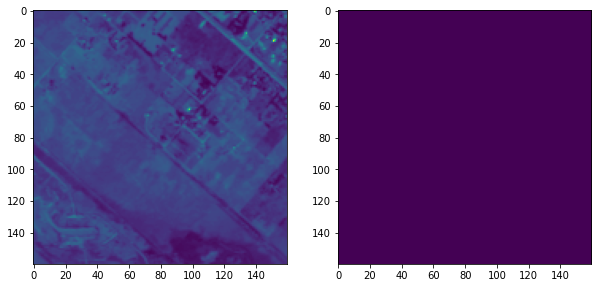

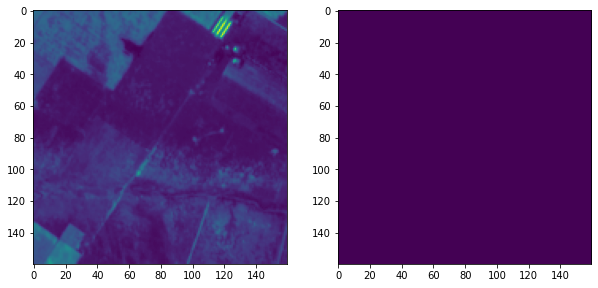

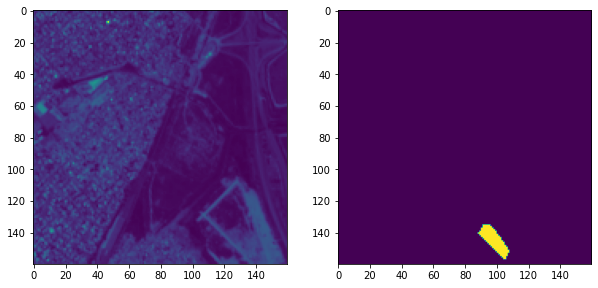

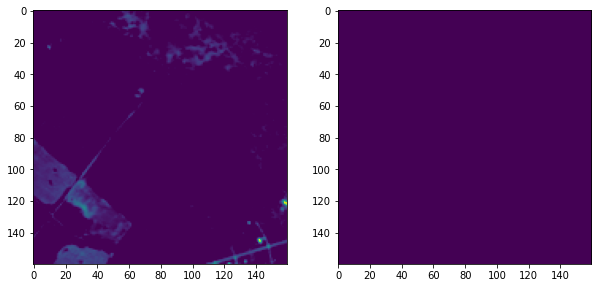

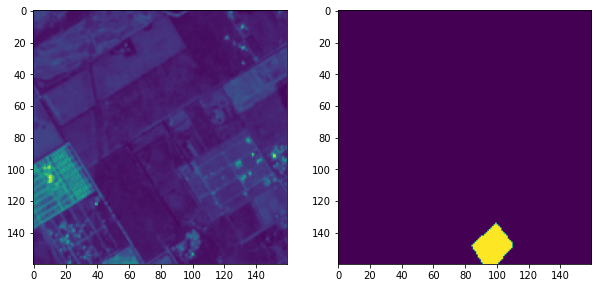

In [13]:
plot_data_generator(num_samples=5, fig_size=(10, 10), train_config=config, img_ch = 3)


In [ ]:
res_config = train(config)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 160, 160, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.plot(res_config.history['loss'])
plt.plot(res_config.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(res_config.history['mean_io_u_2'])
plt.plot(res_config.history['val_mean_io_u_2'])
plt.title('mean_iou')
plt.ylabel('val_mean_iou')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


plt.show()